# Figure 4.15, 4.16, and 4.17

Oscillatory network.

In [1]:
using LinearAlgebra
using DifferentialEquations
using Parameters
using LabelledArrays

using Plots
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [2]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
"""
Model of oscillatory network from Figure 4.14. This code generates Figures
4.15, 4.16, and 4.17
"""
function model!(du, u, p, t)
    @unpack s1, s2 = u
    @unpack K0, K1, K2, N = p
    v0 = K0
    v1 = K1 * s1 * (1 + s2^N)
    v2 = K2 * s2
	du.s1 = v0 - v1
	du.s2 = v1 - v2
    return du
end

model!

In [4]:
function figure0415(; param = (K0 = 8.0, K1 = 1.0, K2 = 5.0, N = 2),
	                  r = LinRange(0.0, 4.0, 20),
	                  tend = 8.0,
	                  figtitle="Fig 4.15")

	u0s = ( LVector(s1=1.5, s2=1.0), LVector(s1=0.0, s2=1.0),
        	LVector(s1=0.0, s2=3.0), LVector(s1=2.0, s2=0.0))
	sols = map(u0 -> solve(ODEProblem(model!, u0, tend, param)), u0s)

	# Fig 4.15 A
	p1 = plot(sols[1], xlabel="Time", ylabel="Concentration", title ="$figtitle (A)", xlims=(0.0, 8.0))
	
	# Fig 4.15 B: Vetor field
	function ∂F(x, y)
		u = LVector(s1=x, s2=y)
		dxdy = model!(similar(u), u, param, 0.0)
		return dxdy ./ (norm(dxdy)^0.5 * 20)
	end
	
	nullcline_s1(s2, p=param) = (p.K0 / p.K1) * hill(1, s2, p.N)
	nullcline_s2(s2, p=param) = (p.K2 * s2) / (p.K1 * (1 + s2^p.N))
	
	
	xx = [x for y in r, x in r]
	yy = [y for y in r, x in r]
	p2 = quiver(xx, yy, quiver=∂F, line=(:lightblue))

	for sol in sols
		plot!(p2, sol, vars=(1, 2), label=nothing)
	end
	
	rMin, rMax = r[1], r[end]
	
	plot!(p2, nullcline_s1, identity, rMin, rMax, label="Nullcline S1", line=(:dash, :red))
	plot!(p2, nullcline_s2, identity, rMin, rMax, label="Nullcline S2", line=(:dash, :blue))
	plot!(p2, title = "$figtitle (B)", xlabel="[S1]", ylabel="[S2]", 
      xlims=(rMin, rMax), ylims=(rMin, rMax), aspect_ratio=:equal, size=(700, 700))
	
	return (p1, p2)
end

figure0415 (generic function with 1 method)

In [5]:
fig415a, fig415b = figure0415()

(Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=26})

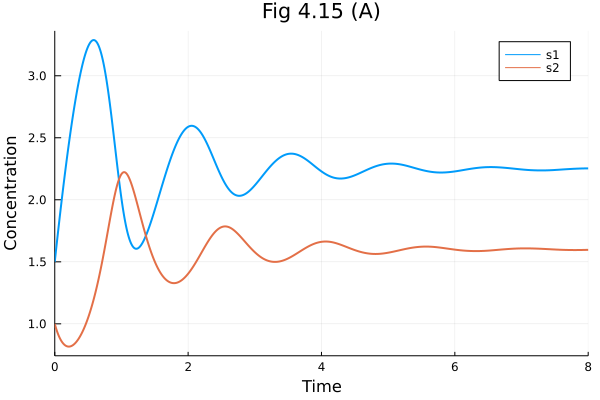

In [6]:
fig415a

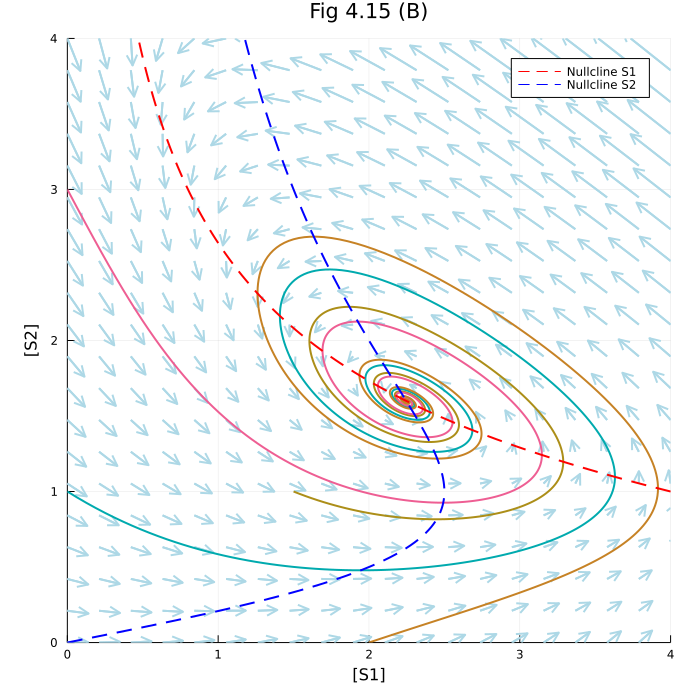

In [7]:
fig415b

In [8]:
fig416a, fig416b = figure0415(param = (K0 = 8.0, K1 = 1.0, K2 = 5.0, N = 2.5), tend = 1000.0, figtitle="Fig 4.16")

(Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=26})

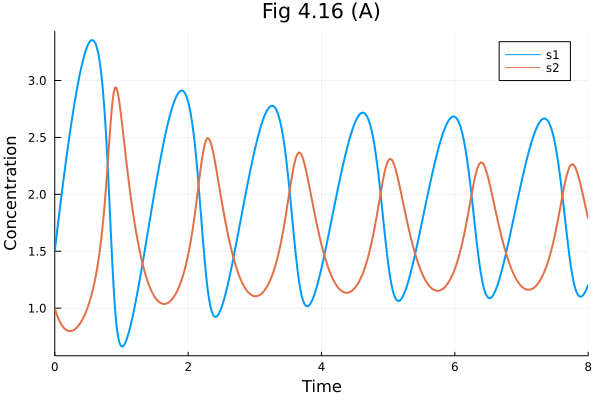

In [9]:
fig416a

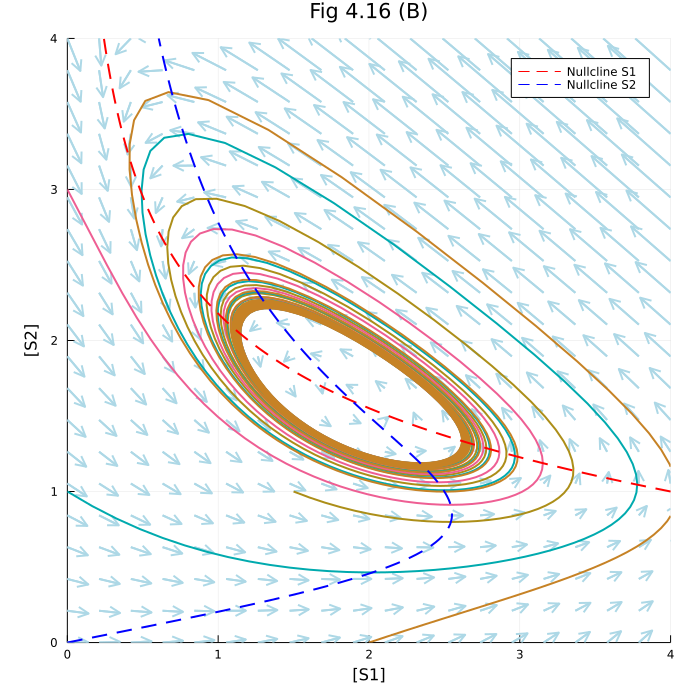

In [10]:
fig416b

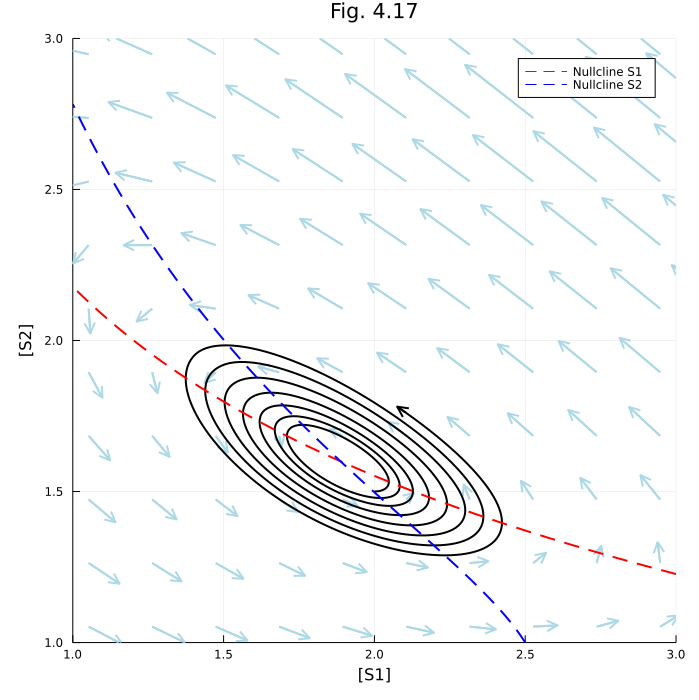

In [11]:
param = (K0 = 8.0, K1 = 1.0, K2 = 5.0, N = 2.5)
sol417 = solve(ODEProblem(model!, LVector(s1=2.0, s2=1.5), 10.0, param))
r = LinRange(0.0, 4.0, 20)
xx = [x for y in r, x in r]
yy = [y for y in r, x in r]

"Vetor field"
function ∂F(x, y)
    u = LVector(s1=x, s2=y)
    dxdy = model!(similar(u), u, param, 0.0)
    return dxdy ./ (norm(dxdy)^0.5 * 20)
end

nullcline_s1(s2, p=param) = (p.K0 / p.K1) * hill(1, s2, p.N)
nullcline_s2(s2, p=param) = (p.K2 * s2) / (p.K1 * (1 + s2^p.N))


xx = [x for y in r, x in r]
yy = [y for y in r, x in r]
p2 = quiver(xx, yy, quiver=∂F, line=(:lightblue))


quiver(xx, yy, quiver=∂F, line=(:lightblue))
plot!(sol417, vars=(1, 2), label=nothing, line=(:black), arrow=0.4)


plot!(nullcline_s1, identity, 0.0, 4.0, label="Nullcline S1", line=(:dash, :red))
plot!(nullcline_s2, identity, 0.0, 4.0, label="Nullcline S2", line=(:dash, :blue))
plot!(title = "Fig. 4.17", xlabel="[S1]", ylabel="[S2]", 
      xlims=(1.0, 3.0), ylims=(1.0, 3.0), aspect_ratio=:equal, size=(700, 700))